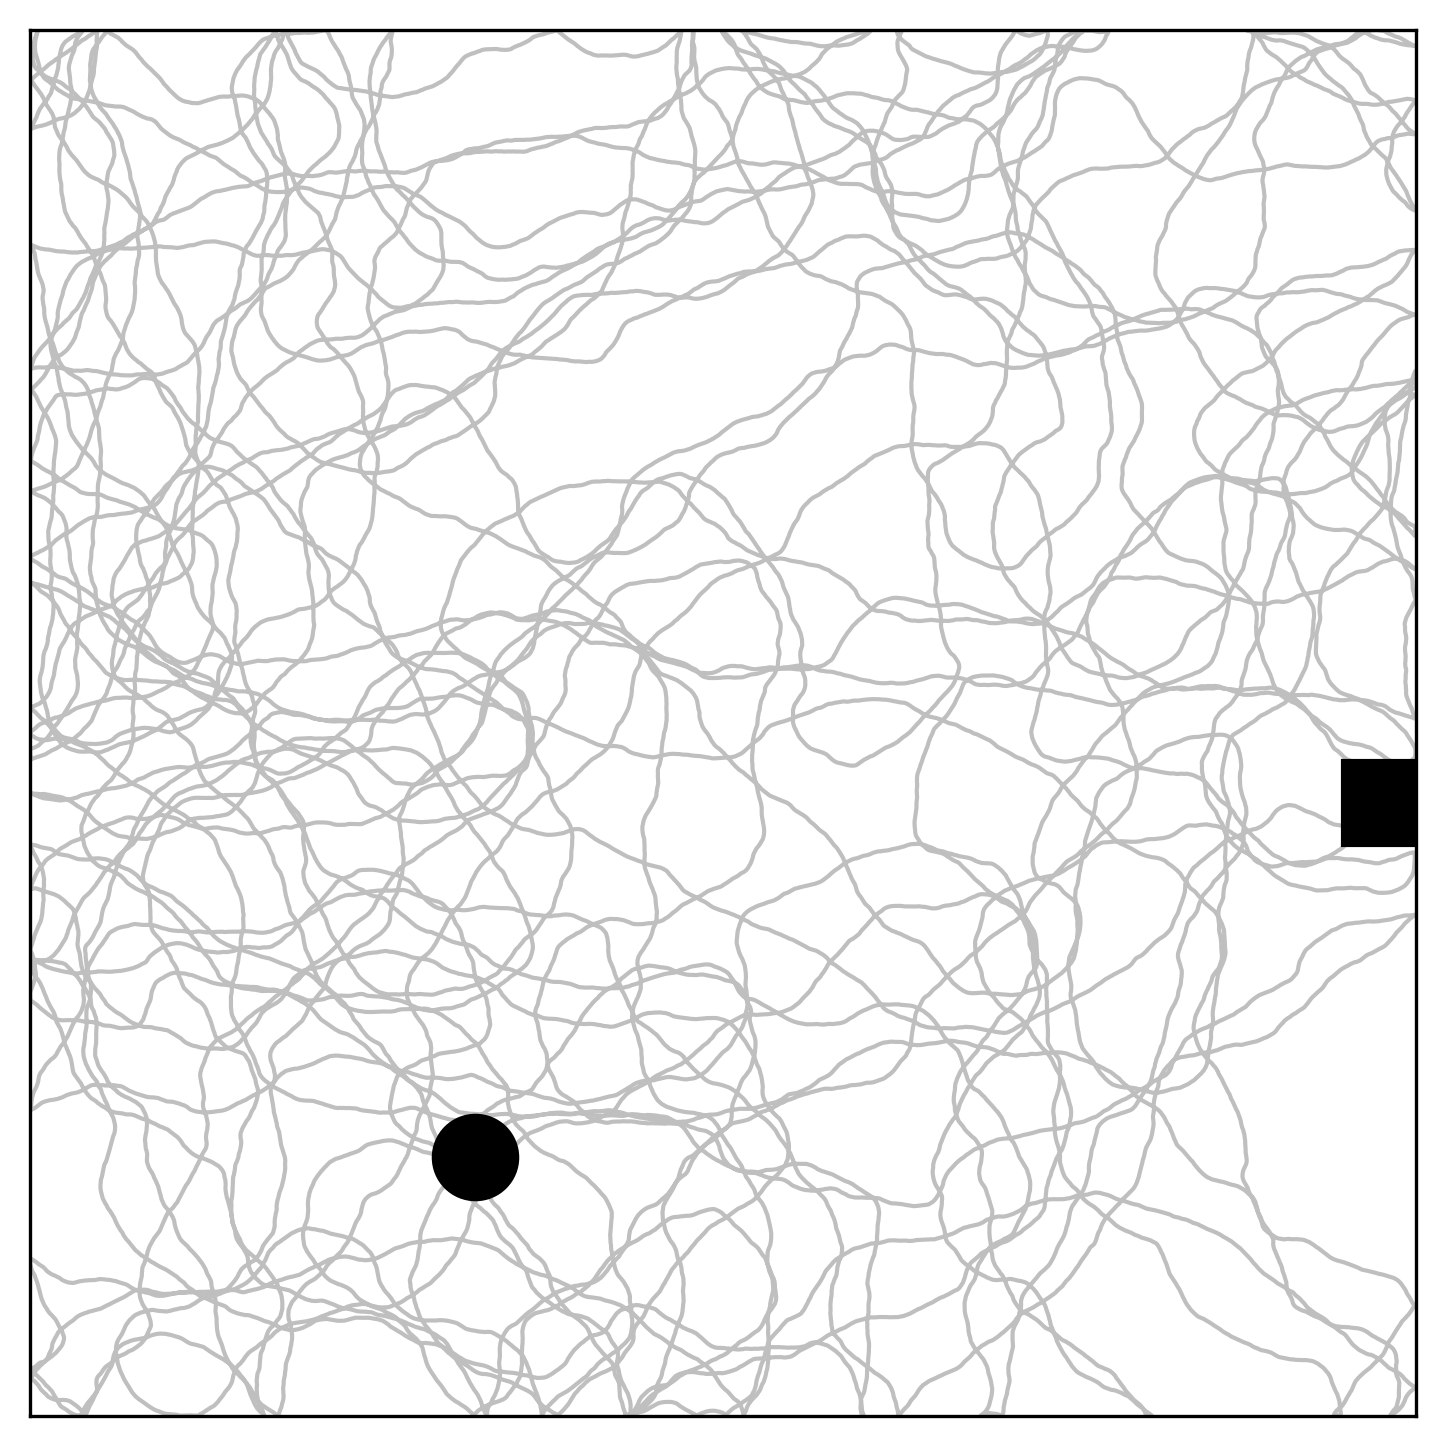

In [16]:
import numpy as np
import matplotlib.pyplot as plt
# Environment settings
env_min = 0
env_max = 4

# Random walk settings
n_steps = 50000
dt = 0.05
speed = 0.1     # constant speed
turn_noise = 0.1  # radians per step
n_traj = 1      # number of trajectories to plot
# Helper: is a point valid?
def is_valid(pos):
    x, y = pos
    if not (env_min <= x <= env_max and env_min <= y <= env_max):
        return False
    return True
# Generate trajectories
trajectories = []
for _ in range(n_traj):
    pos = np.array([np.random.uniform(0, 4), np.random.uniform(0, 4)])  
    angle = np.random.uniform(0, 2*np.pi)
    path = [pos.copy()]
    for _ in range(n_steps):
        # Add small random turn
        angle += np.random.randn() * turn_noise
        velocity = speed * np.array([np.cos(angle), np.sin(angle)])
        new_pos = pos + velocity * dt
        if is_valid(new_pos):
            pos = new_pos
        else:
            # Resample a new random direction if invalid move
            angle = np.random.uniform(0, 2*np.pi)
        path.append(pos.copy())
    trajectories.append(np.array(path))
# Plot
fig, ax = plt.subplots(figsize=(6, 6),dpi=300)
for traj in trajectories:
    # Plot trajectory
    ax.plot(traj[:,0], traj[:,1], color='gray', alpha=0.5, linewidth=1)
#     for i in range(1, len(traj)):
#         ax.plot(traj[i-1:i+1,0], traj[i-1:i+1,1], color=‘gray’, alpha=0.5, linewidth=1)
    # Mark start
    start = traj[0]
    ax.plot(start[0], start[1], 'o', markersize=20, c='black')
    # Mark end
    end = traj[-1]
    ax.plot(end[0], end[1], 's', markersize=20, c='black')
# Forbidden region
# ax.add_patch(plt.Rectangle((0, 0), forbidden_x, forbidden_y,
#                            color='red', alpha=0.2, zorder=0))
# Formatting
ax.set_xlim(env_min, env_max)
ax.set_ylim(env_min, env_max)
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])
# ax.set_title(‘Random Walk with Forbidden Region’)
plt.show()

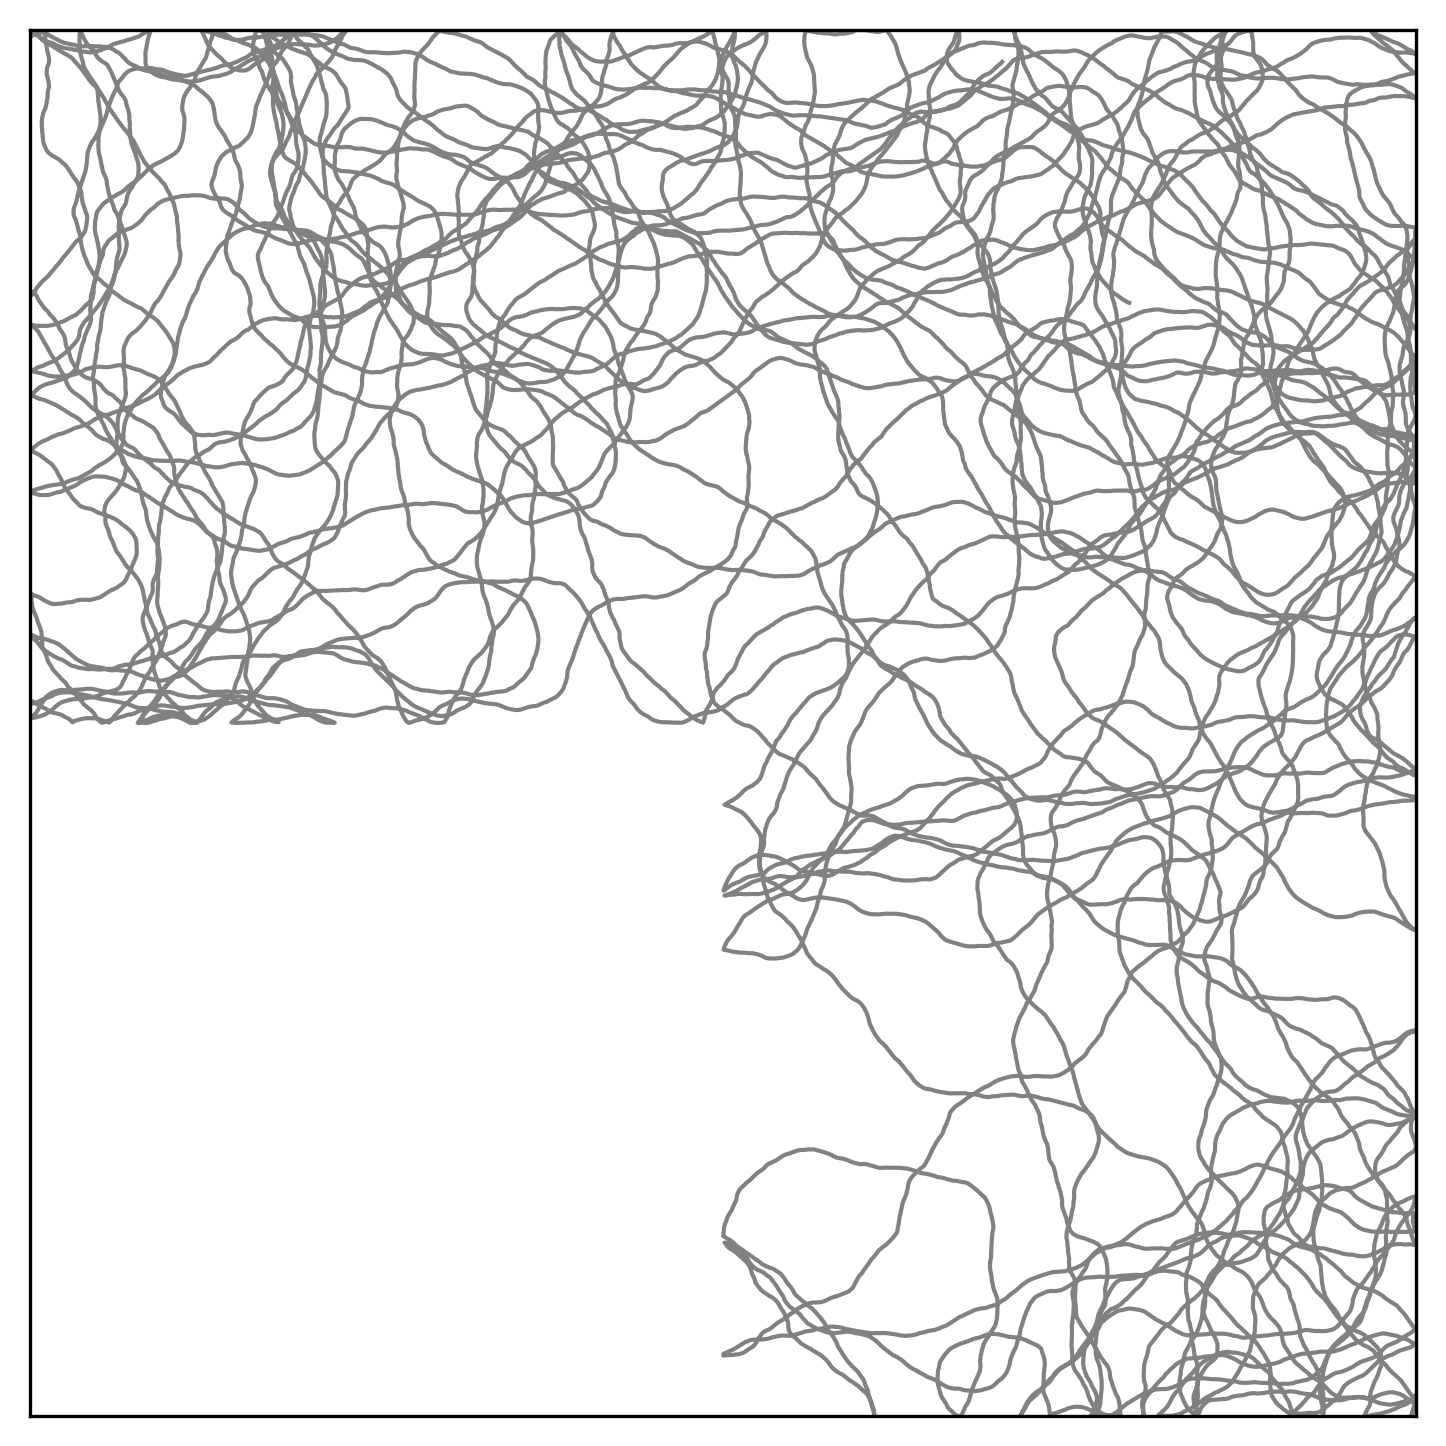

In [34]:

import numpy as np
import matplotlib.pyplot as plt

# Environment settings
env_min = 0
env_max = 4
forbidden_x = 2
forbidden_y = 2

# Random walk settings
n_steps = 50000
dt = 0.05
speed = 0.1     # constant speed
turn_noise = 0.1  # radians per step
n_traj = 1      # number of trajectories to plot

# Helper: is a point valid?
def is_valid(pos):
    x, y = pos
    if not (env_min <= x <= env_max and env_min <= y <= env_max):
        return False
    if x < forbidden_x and y < forbidden_y:
        return False
    return True

# Generate trajectories
trajectories = []
for _ in range(n_traj):
    pos = np.array([np.random.uniform(2, 4), np.random.uniform(2, 4)])  # start outside forbidden
    angle = np.random.uniform(0, 2*np.pi)
    path = [pos.copy()]
    
    for _ in range(n_steps):
        # Add small random turn
        angle += np.random.randn() * turn_noise
        velocity = speed * np.array([np.cos(angle), np.sin(angle)])
        new_pos = pos + velocity * dt
        
        if is_valid(new_pos):
            pos = new_pos
        else:
            # Resample a new random direction if invalid move
            angle = np.random.uniform(0, 2*np.pi)
        
        path.append(pos.copy())
    
    trajectories.append(np.array(path))

# Plot
fig, ax = plt.subplots(figsize=(6, 6),dpi=300)
for traj in trajectories:
    # Plot trajectory
    ax.plot(traj[:,0], traj[:,1], color='gray', alpha=0.99, linewidth=1)

#     for i in range(1, len(traj)):
#         ax.plot(traj[i-1:i+1,0], traj[i-1:i+1,1], color='gray', alpha=0.5, linewidth=1)
    # Mark start
    start = traj[0]
#     ax.plot(start[0], start[1], 'o', markersize=20, c='black')
    # Mark end
    end = traj[-1]
#     ax.plot(end[0], end[1], 's', markersize=20, c='black')

# Forbidden region
# ax.add_patch(plt.Rectangle((0, 0), forbidden_x, forbidden_y,
#                            color='red', alpha=0.2, zorder=0))

# Formatting
ax.set_xlim(env_min, env_max)
ax.set_ylim(env_min, env_max)
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])
# ax.set_title('Random Walk with Forbidden Region')

plt.show()

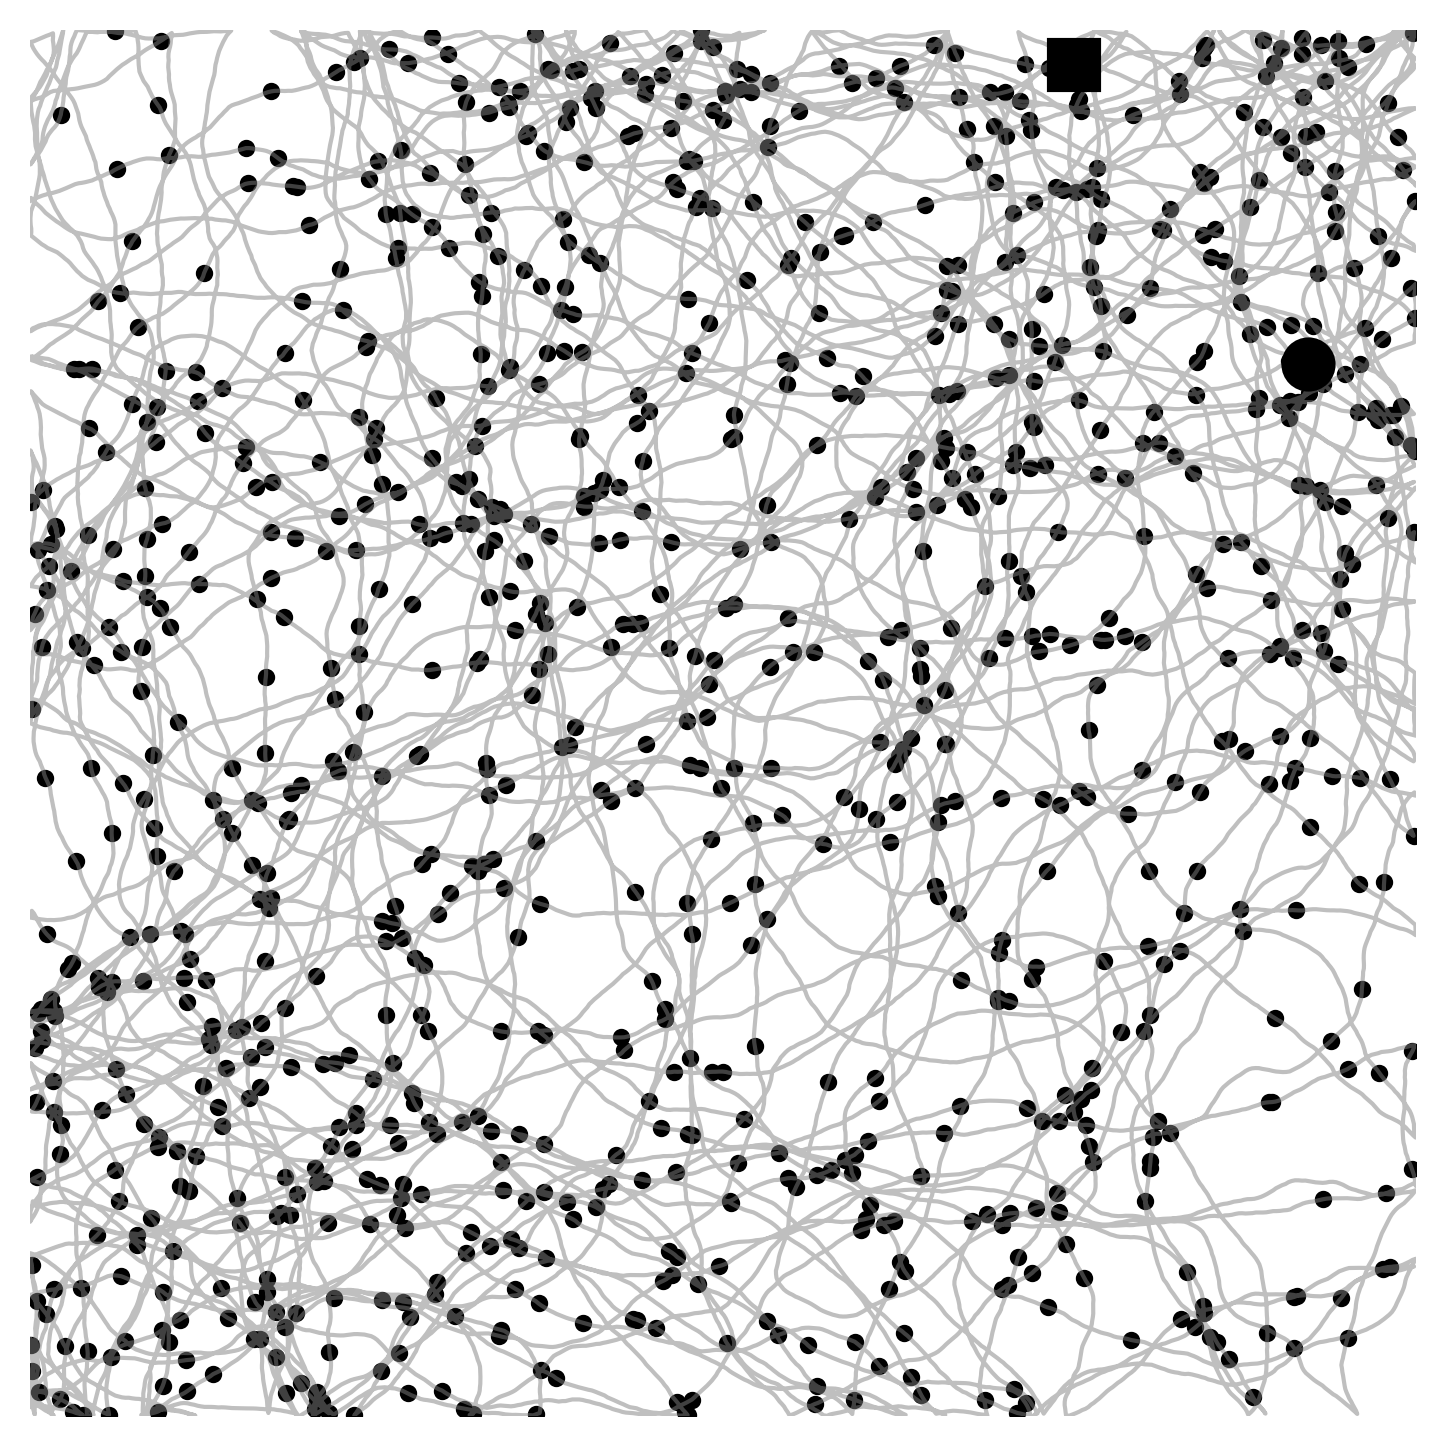

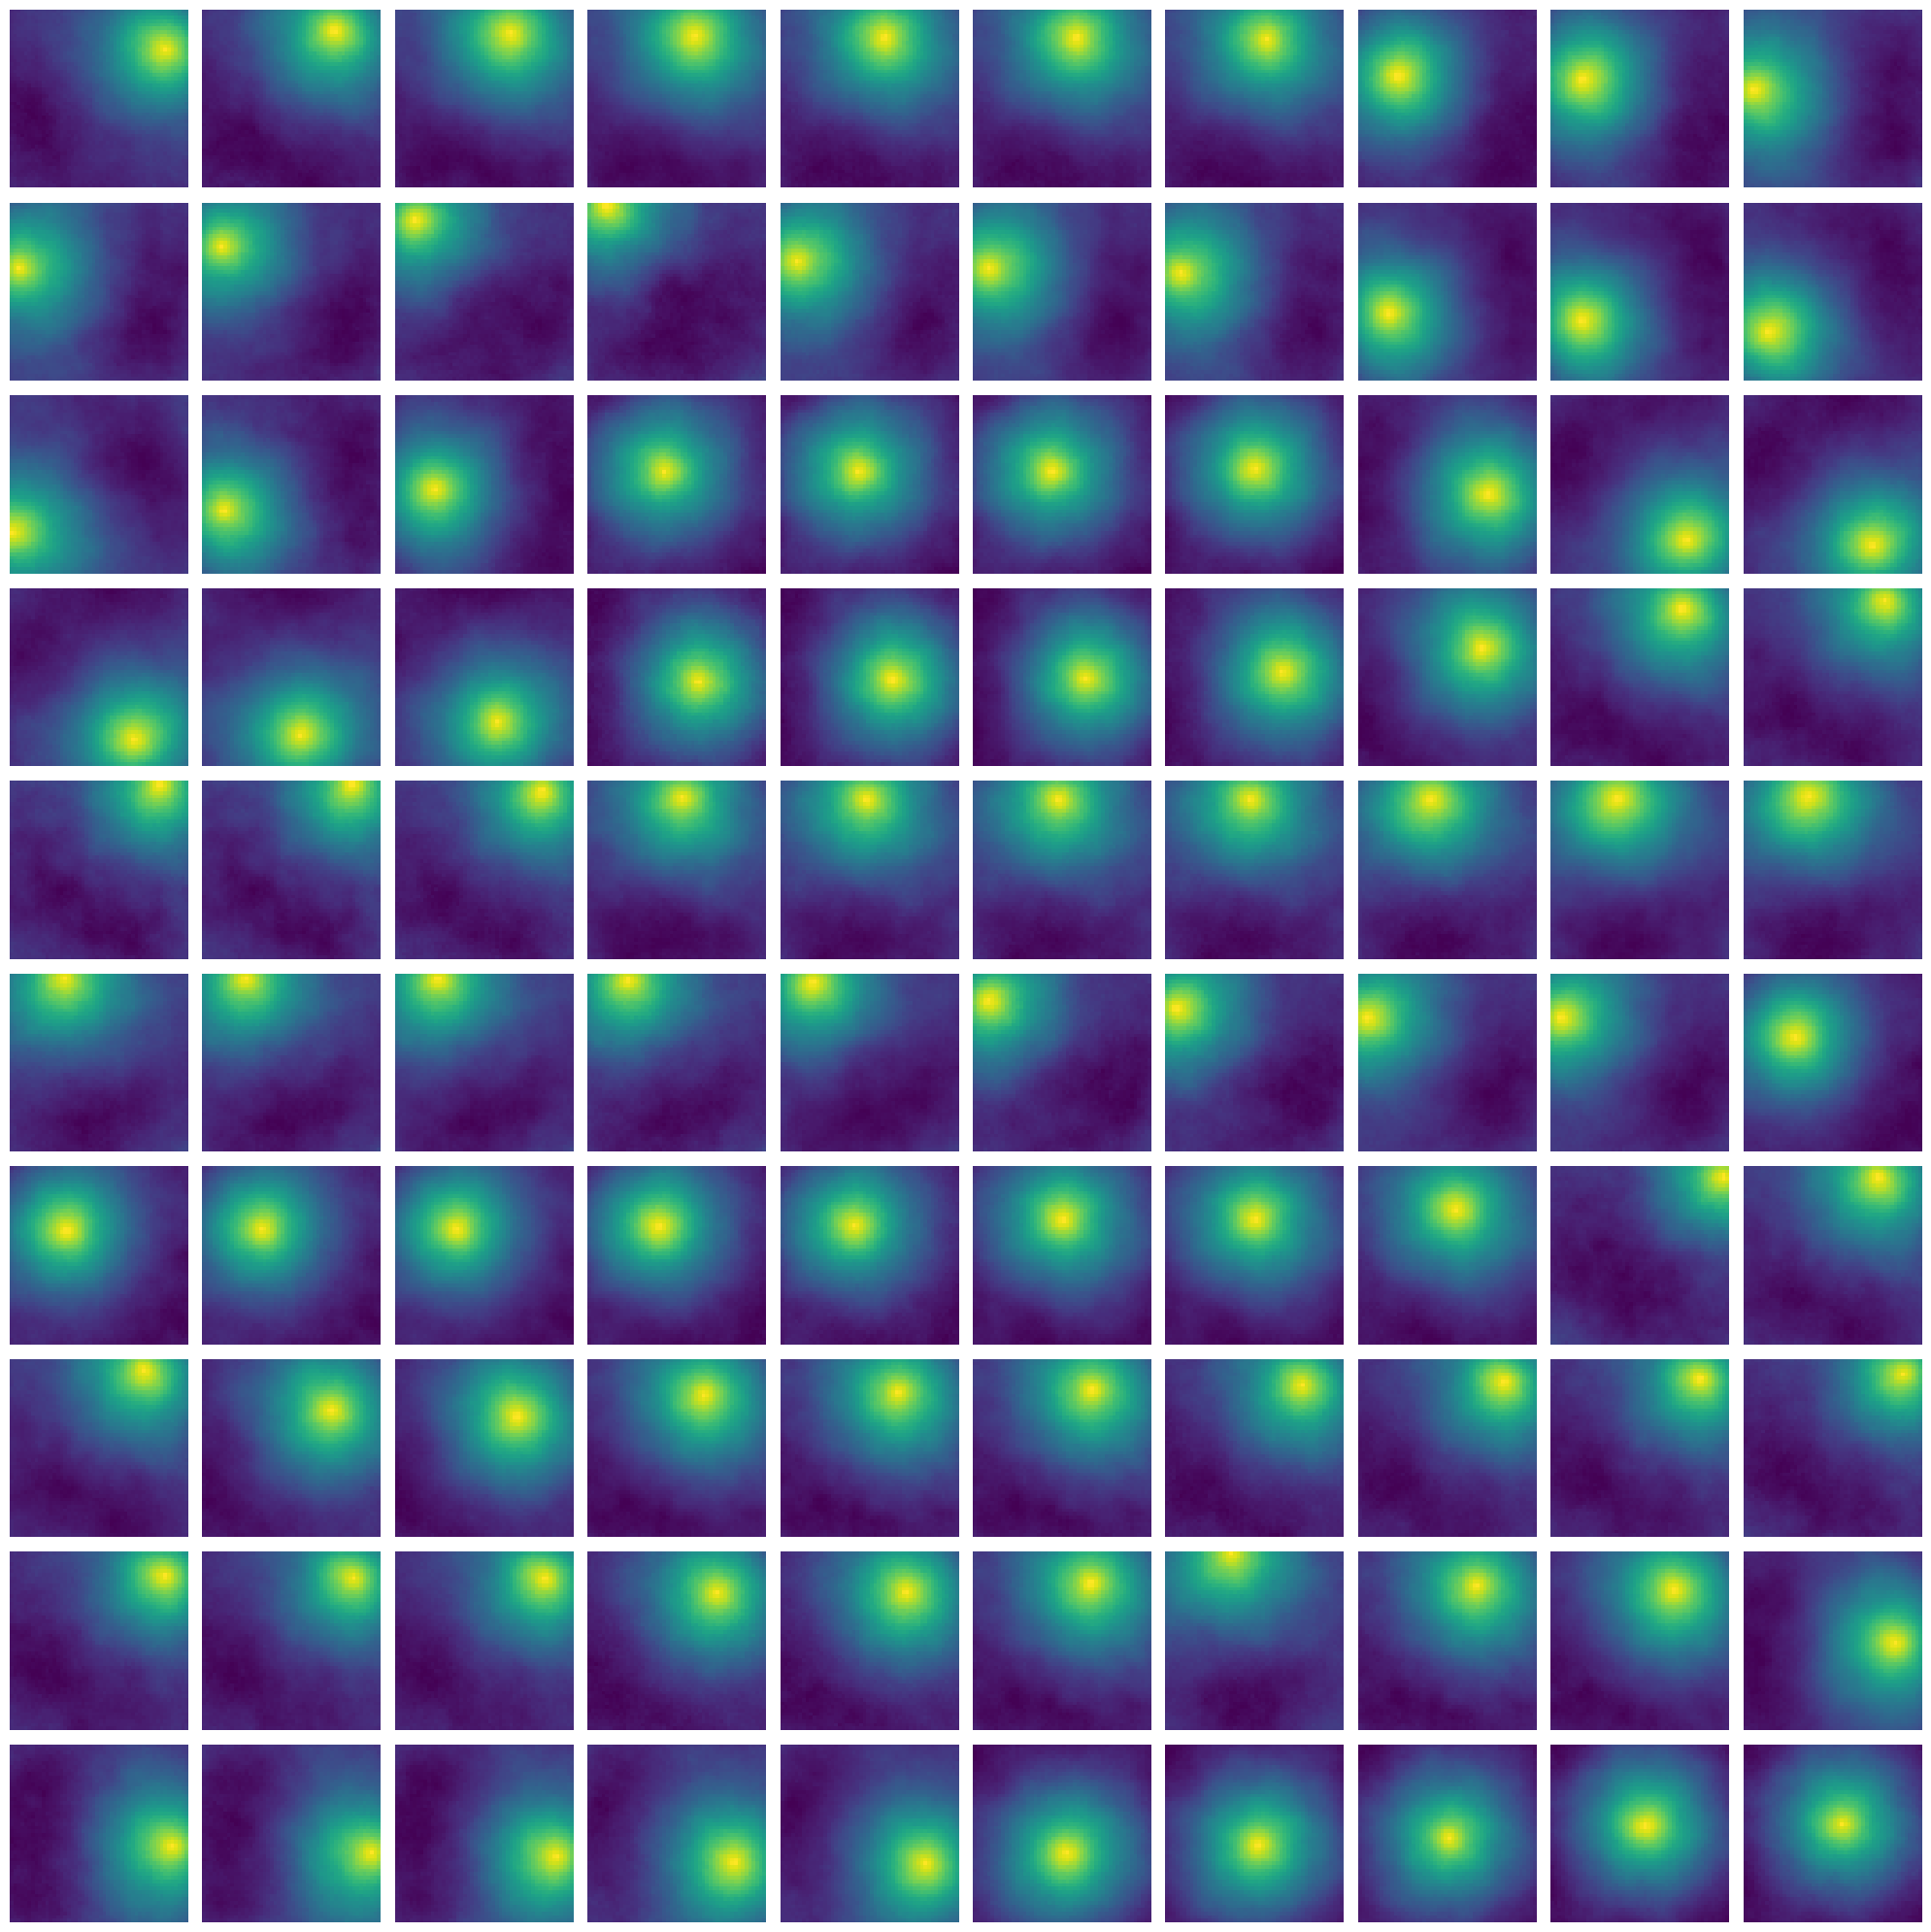

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Function Definitions
# -------------------------

def is_valid(pos, env_min=0, env_max=4):
    x, y = pos
    return env_min <= x <= env_max and env_min <= y <= env_max

def generate_grid_cells(n_cells=1000, arena_size=4, seed=None):
    if seed is not None:
        np.random.seed(seed)
    scales = np.random.uniform(0.02, 8, size=n_cells)
    phases = np.random.uniform(0, arena_size, size=(n_cells, 2))
    orientations = np.random.uniform(0, np.pi/3, size=n_cells)
    return scales, phases, orientations

def grid_activation(x, y, scales, phases, orientations):
    positions = np.array([x, y])
    activations = []
    angles = np.array([0, np.pi / 3, 2 * np.pi / 3])
    for scale, phase, orientation in zip(scales, phases, orientations):
        # Rotate and compute grating
        R = np.array([[np.cos(orientation), -np.sin(orientation)],
                      [np.sin(orientation),  np.cos(orientation)]])
        pos_rot = R @ (positions - phase)
        proj = pos_rot[0] * np.cos(angles) + pos_rot[1] * np.sin(angles)
        grating = np.sum(np.cos((4 * np.pi / (scale * np.sqrt(3))) * proj))
        activations.append((2/3) * grating)
    return np.array(activations)

def grid_activation_vectorized(X, Y, scales, phases, orientations):
    H, W = X.shape
    n_cells = len(scales)
    pos = np.stack([X.ravel(), Y.ravel()], axis=1)  # (H*W, 2)
    activations = np.zeros((H * W, n_cells))
    angles = np.array([0, np.pi / 3, 2 * np.pi / 3])

    for i in range(n_cells):
        scale = scales[i]
        phase = phases[i]
        orientation = orientations[i]
        c, s = np.cos(orientation), np.sin(orientation)
        R = np.array([[c, -s], [s, c]])
        rel_pos = pos - phase
        pos_rot = rel_pos @ R.T
        proj = np.outer(pos_rot[:, 0], np.cos(angles)) + np.outer(pos_rot[:, 1], np.sin(angles))
        grating = np.sum(np.cos((4 * np.pi / (scale * np.sqrt(3))) * proj), axis=1)
        activations[:, i] = (2/3) * grating

    return activations.reshape(H, W, n_cells)

# -------------------------
# Random Walk Generation
# -------------------------

env_min, env_max = 0, 4
n_steps = 50000
dt = 0.05
speed = 0.2
turn_noise = 0.1

pos = np.random.uniform(env_min, env_max, size=2)
angle = np.random.uniform(0, 2*np.pi)
trajectory = [pos.copy()]

for _ in range(n_steps):
    angle += np.random.randn() * turn_noise
    vel = speed * np.array([np.cos(angle), np.sin(angle)])
    new_pos = pos + vel * dt
    if is_valid(new_pos, env_min, env_max):
        pos = new_pos
    else:
        angle = np.random.uniform(0, 2*np.pi)
    trajectory.append(pos.copy())

trajectory = np.array(trajectory)

# -------------------------
# Grid Cell Setup
# -------------------------

n_cells = 1000
scales, phases, orientations = generate_grid_cells(n_cells, env_max)

# -------------------------
# Plateau Events & Weights
# -------------------------

n_plateau = 1000
plateau_times = np.sort(np.random.choice(np.arange(len(trajectory)), size=n_plateau, replace=False))

weights = np.zeros((n_plateau, n_cells))
for i, t in enumerate(plateau_times):
    x, y = trajectory[t]
    weights[i] = grid_activation(x, y, scales, phases, orientations)

# -------------------------
# Plot 1: Random Walk + Plateau Fires
# -------------------------

fig, ax = plt.subplots(figsize=(6, 6), dpi=300)
ax.plot(trajectory[:, 0], trajectory[:, 1], color='gray', alpha=0.5, linewidth=1)
ax.scatter(trajectory[plateau_times, 0], trajectory[plateau_times, 1],
           c='black', s=10, label='Plateau Fires')
ax.plot(trajectory[0, 0], trajectory[0, 1], 'o', markersize=12, c='black')
ax.plot(trajectory[-1, 0], trajectory[-1, 1], 's', markersize=12, c='black')
ax.set_xlim(env_min, env_max)
ax.set_ylim(env_min, env_max)
ax.set_aspect('equal')
ax.axis('off')
plt.show()

# -------------------------
# Compute Reactive Fields
# -------------------------

grid_res = 50
x_vals = np.linspace(env_min, env_max, grid_res)
y_vals = np.linspace(env_min, env_max, grid_res)
X, Y = np.meshgrid(x_vals, y_vals)

grid_embeddings = grid_activation_vectorized(X, Y, scales, phases, orientations)
# resulting shape: (grid_res, grid_res, n_cells)

# reactive_fields(h, w, neuron) = sum_i grid_embeddings(h,w,i) * weights(neuron,i)
reactive_fields = np.tensordot(grid_embeddings, weights, axes=([2], [1]))  # shape: (H, W, n_plateau)

# -------------------------
# Plot 2: First 100 Reactive Fields
# -------------------------

fig2, axes = plt.subplots(10, 10, figsize=(20, 20))
for idx, ax in enumerate(axes.flatten()):
    im = ax.imshow(reactive_fields[:, :, idx],
                   extent=[env_min, env_max, env_min, env_max],
                   origin='lower')
    ax.axis('off')

plt.tight_layout()
plt.show()


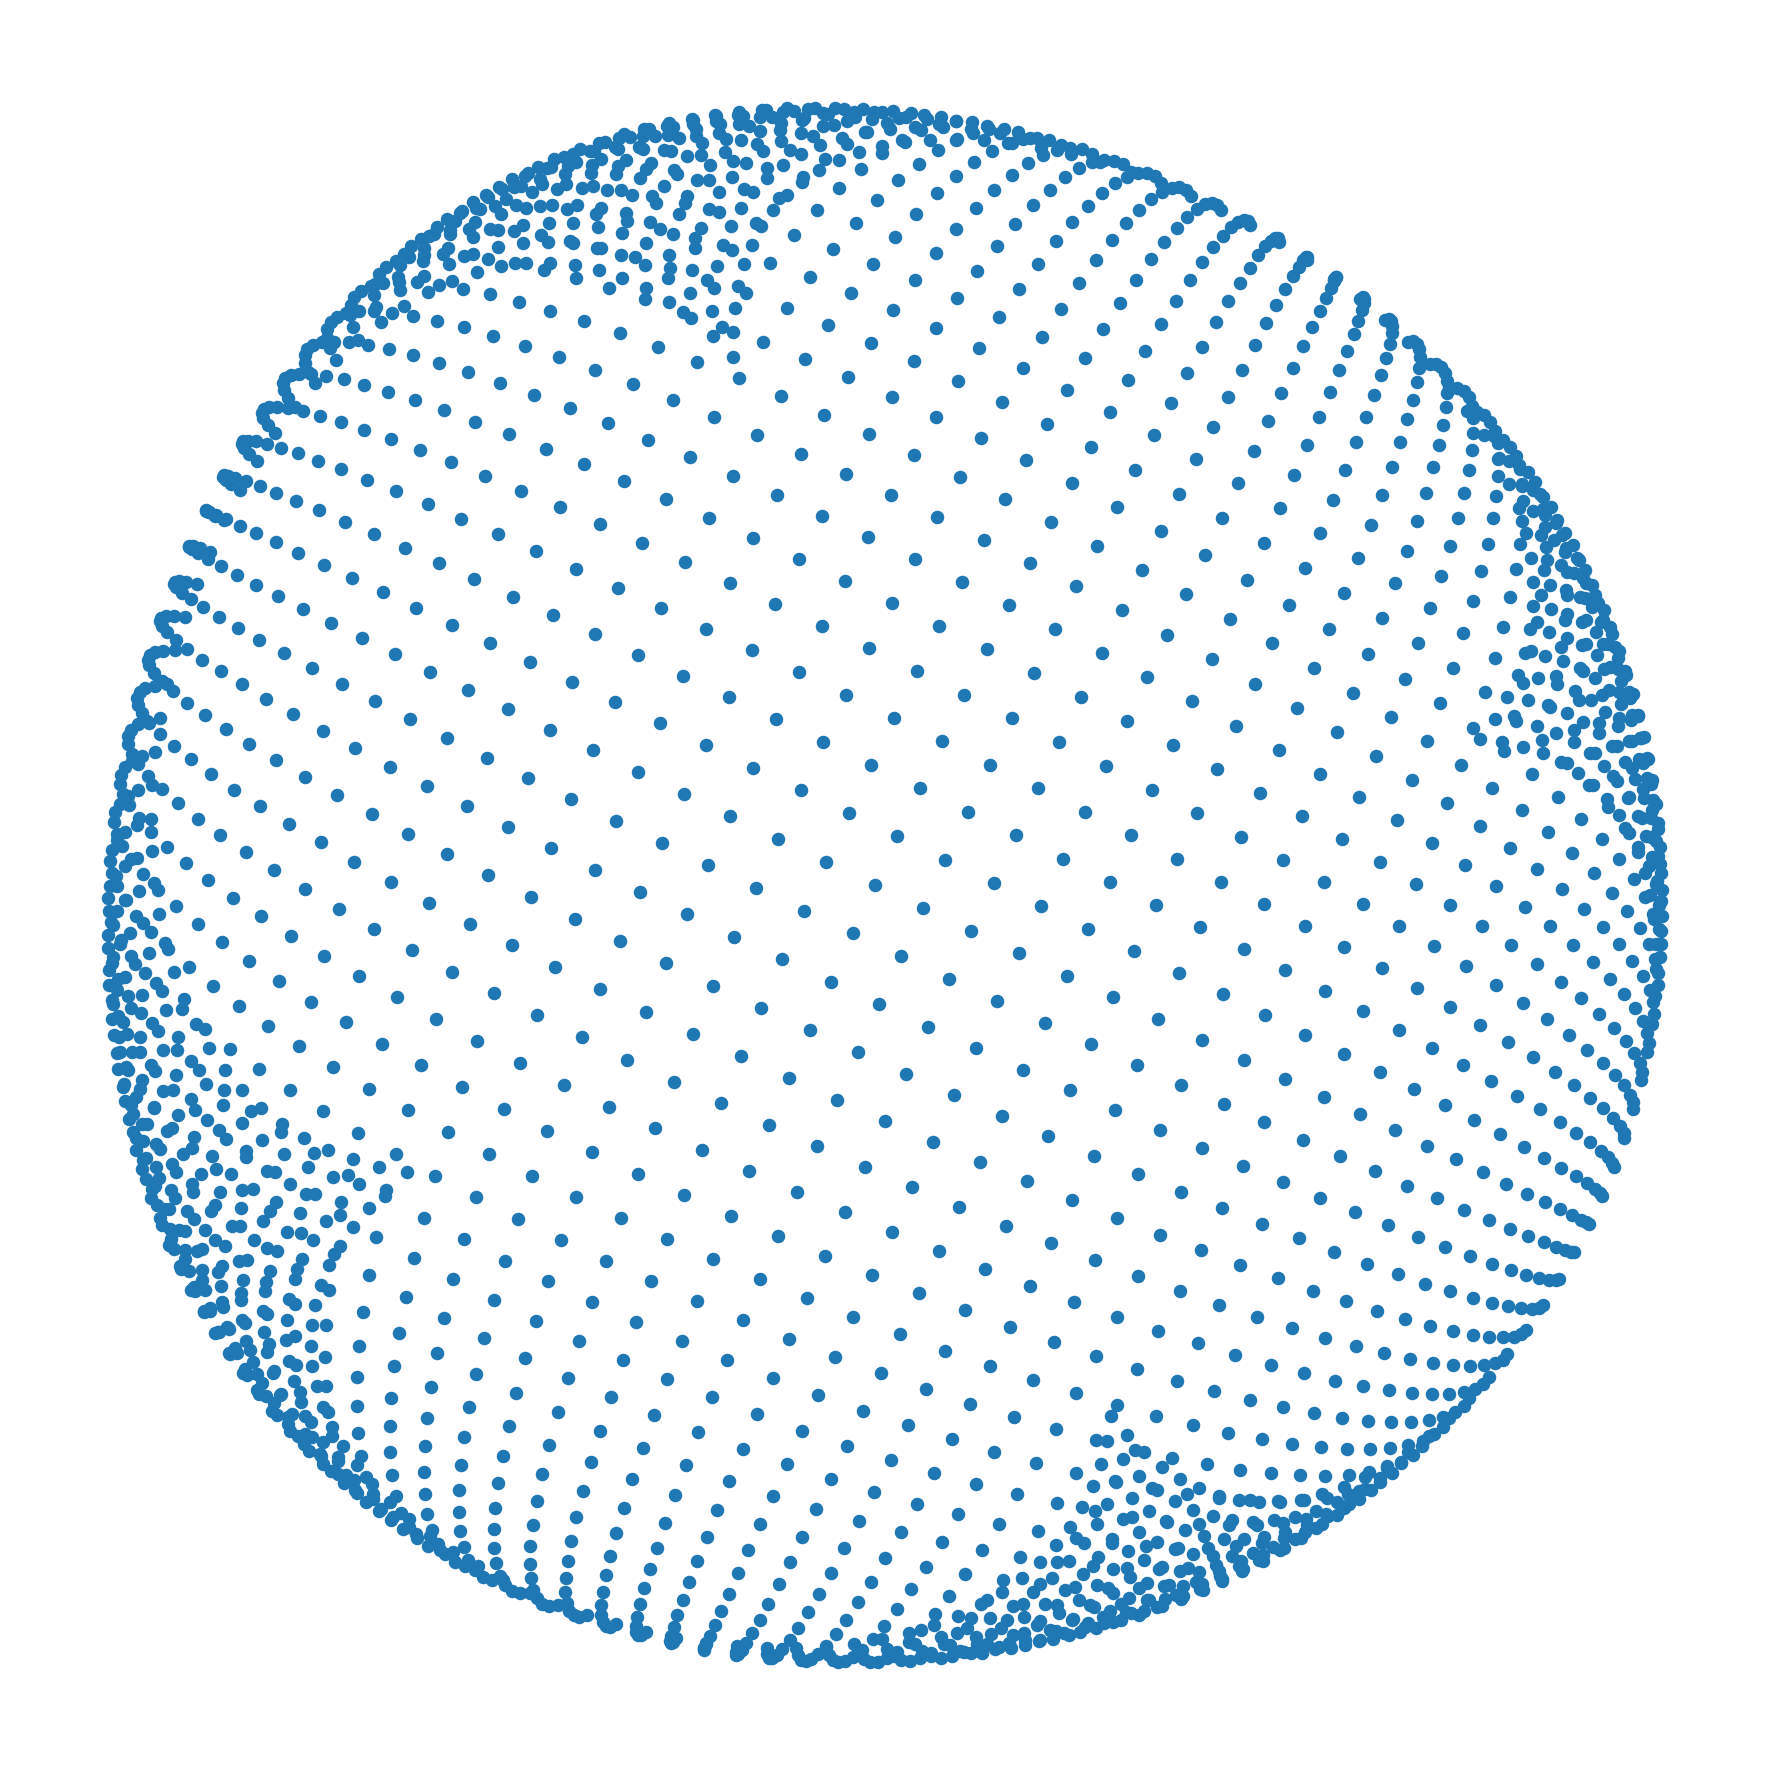

In [3]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Identify top 1% largest-scale grid cells
threshold = np.percentile(scales,85)
large_indices = np.where(scales >= threshold)[0]

# Extract embeddings for only those cells and flatten
H, W, _ = grid_embeddings.shape
emb_large = grid_embeddings[:, :, large_indices].reshape(H * W, len(large_indices))

# PCA on filtered embeddings
pca_large = PCA(n_components=2)
pc_large = pca_large.fit_transform(emb_large)

# Plot
plt.figure(figsize=(6, 6), dpi=300)
plt.scatter(pc_large[:, 0], pc_large[:, 1], s=5)
# plt.title('PCA of Top 1%‑Scale Grid Cell Embeddings')
# plt.xlabel('PC1')
plt.axis('off')
# plt.ylabel('PC2')
plt.tight_layout()
plt.show()


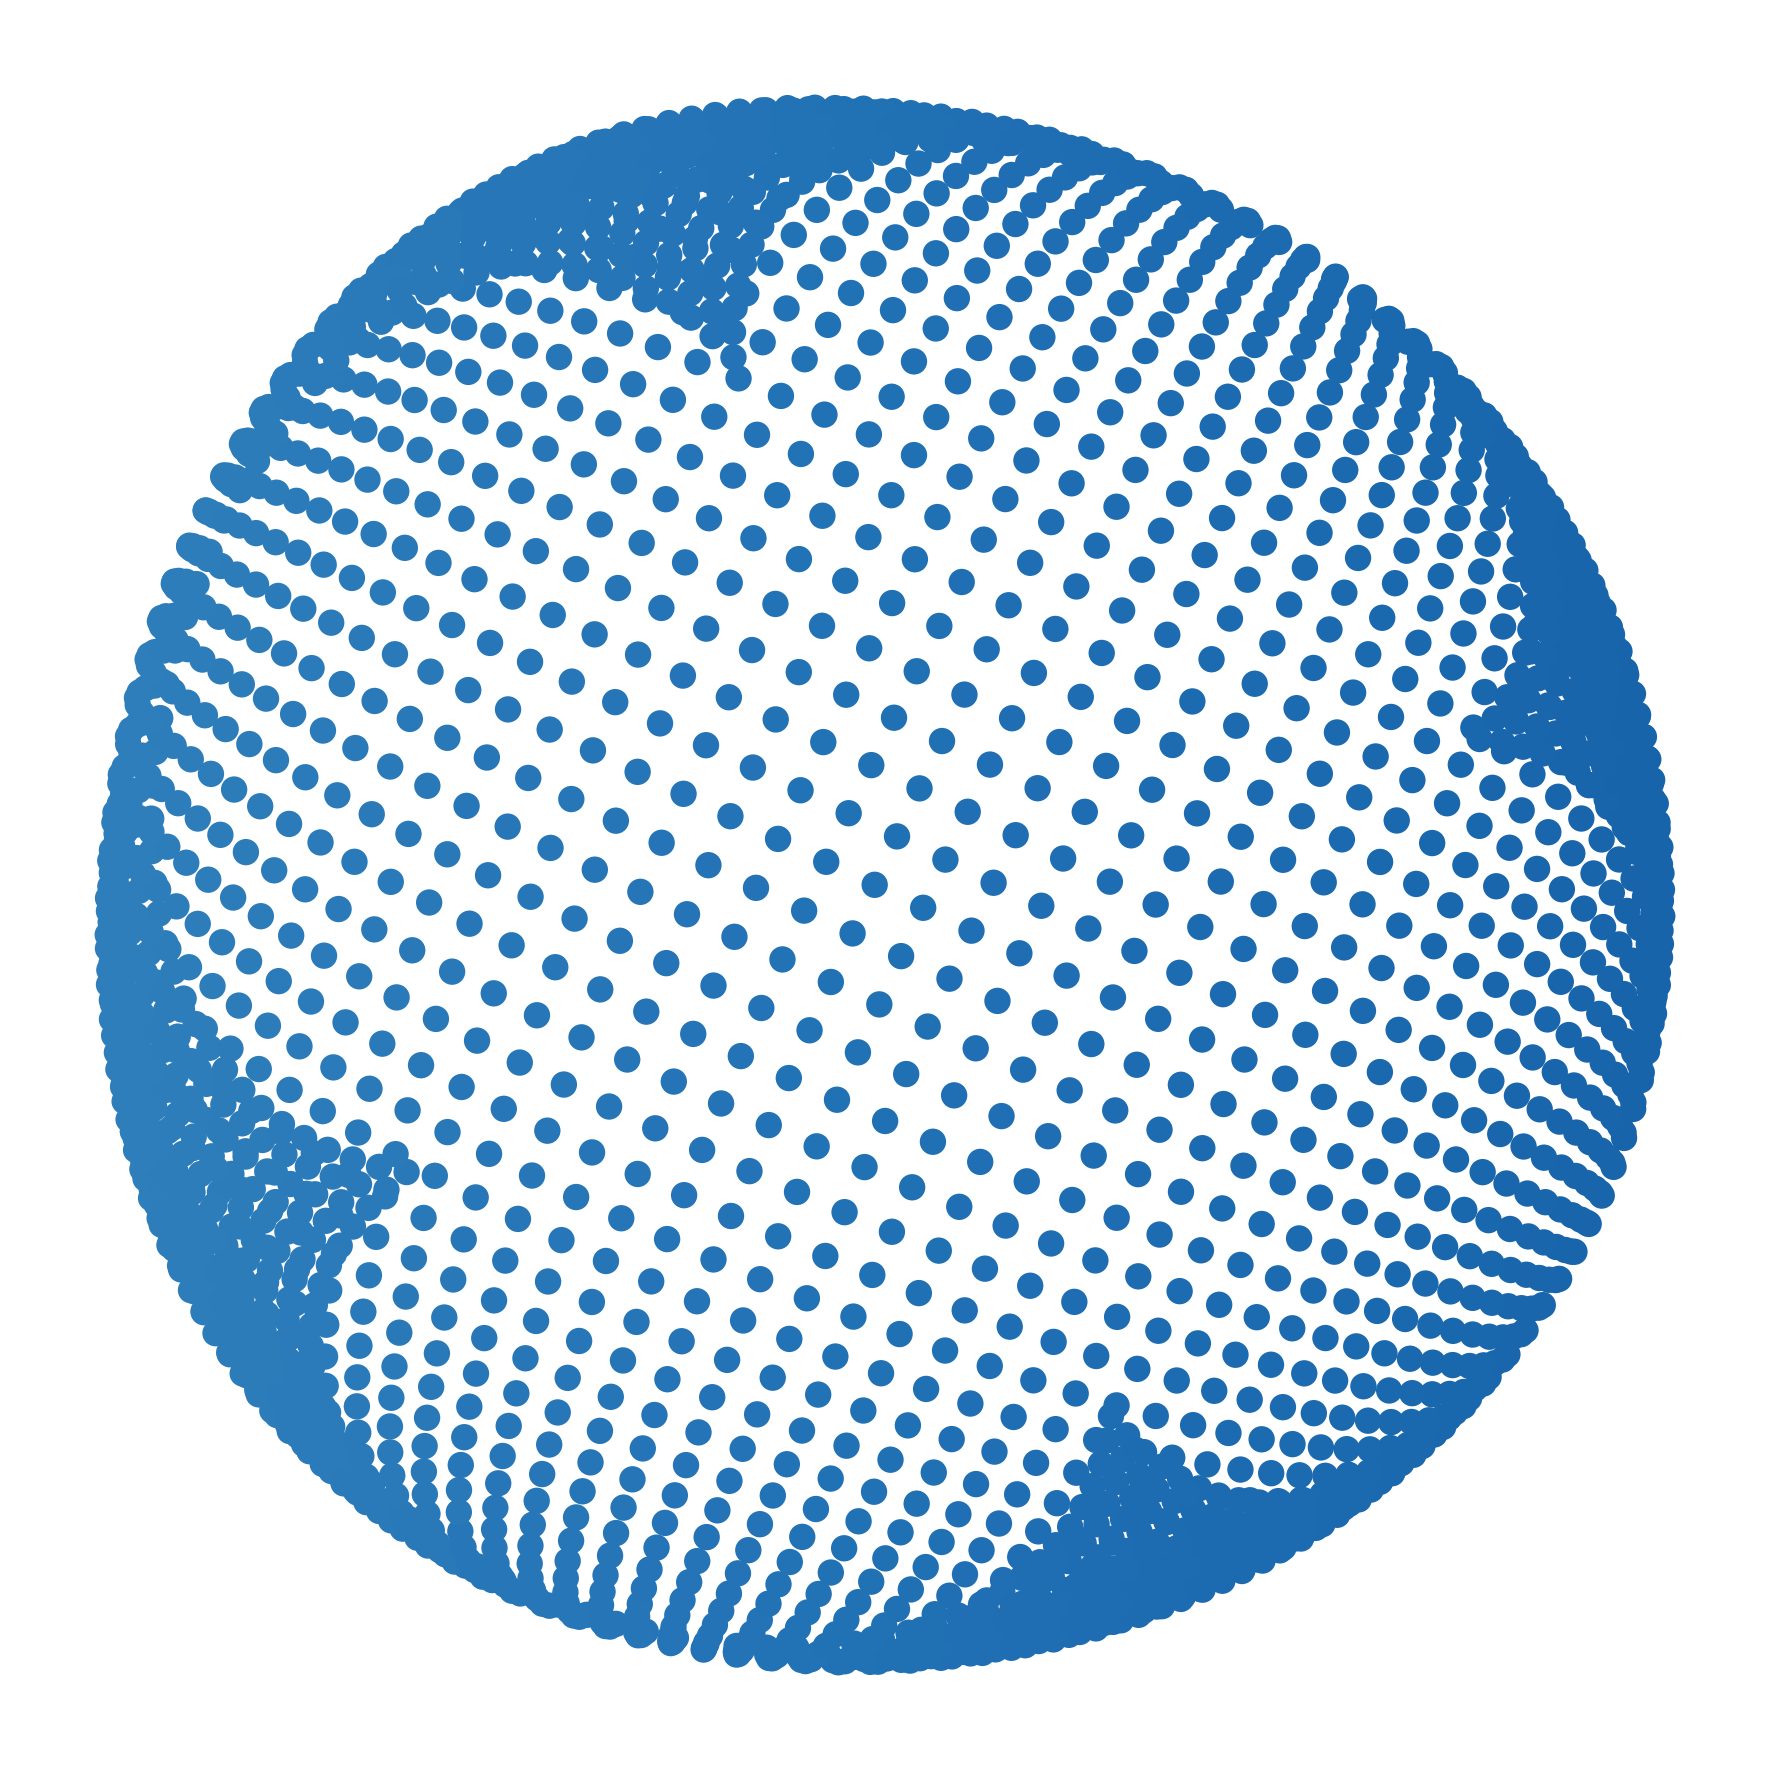

In [13]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, ListedColormap

# Identify top 15% largest-scale grid cells (you had 85th percentile)
threshold = np.percentile(scales, 85)
large_indices = np.where(scales >= threshold)[0]

# Extract embeddings for only those cells and flatten
H, W, _ = grid_embeddings.shape
emb_large = grid_embeddings[:, :, large_indices].reshape(H * W, len(large_indices))

# PCA on filtered embeddings
pca_large = PCA(n_components=2)
pc_large = pca_large.fit_transform(emb_large)

# --- Colormap: Blues truncated to [0.1, 0.3] ---
blues = plt.cm.Blues
trunc_blues = ListedColormap(blues(np.linspace(0.7, 0.8, 256)))

# Normalize by x-values (PC1)
norm = Normalize(vmin=pc_large[:, 0].min(), vmax=pc_large[:, 0].max())

# Plot
plt.figure(figsize=(6, 6), dpi=300)
plt.scatter(pc_large[:, 0], pc_large[:, 1],
            c=pc_large[:, 0], cmap=trunc_blues, norm=norm,
            s=40, linewidths=0)
plt.axis('off')
plt.tight_layout()
plt.show()


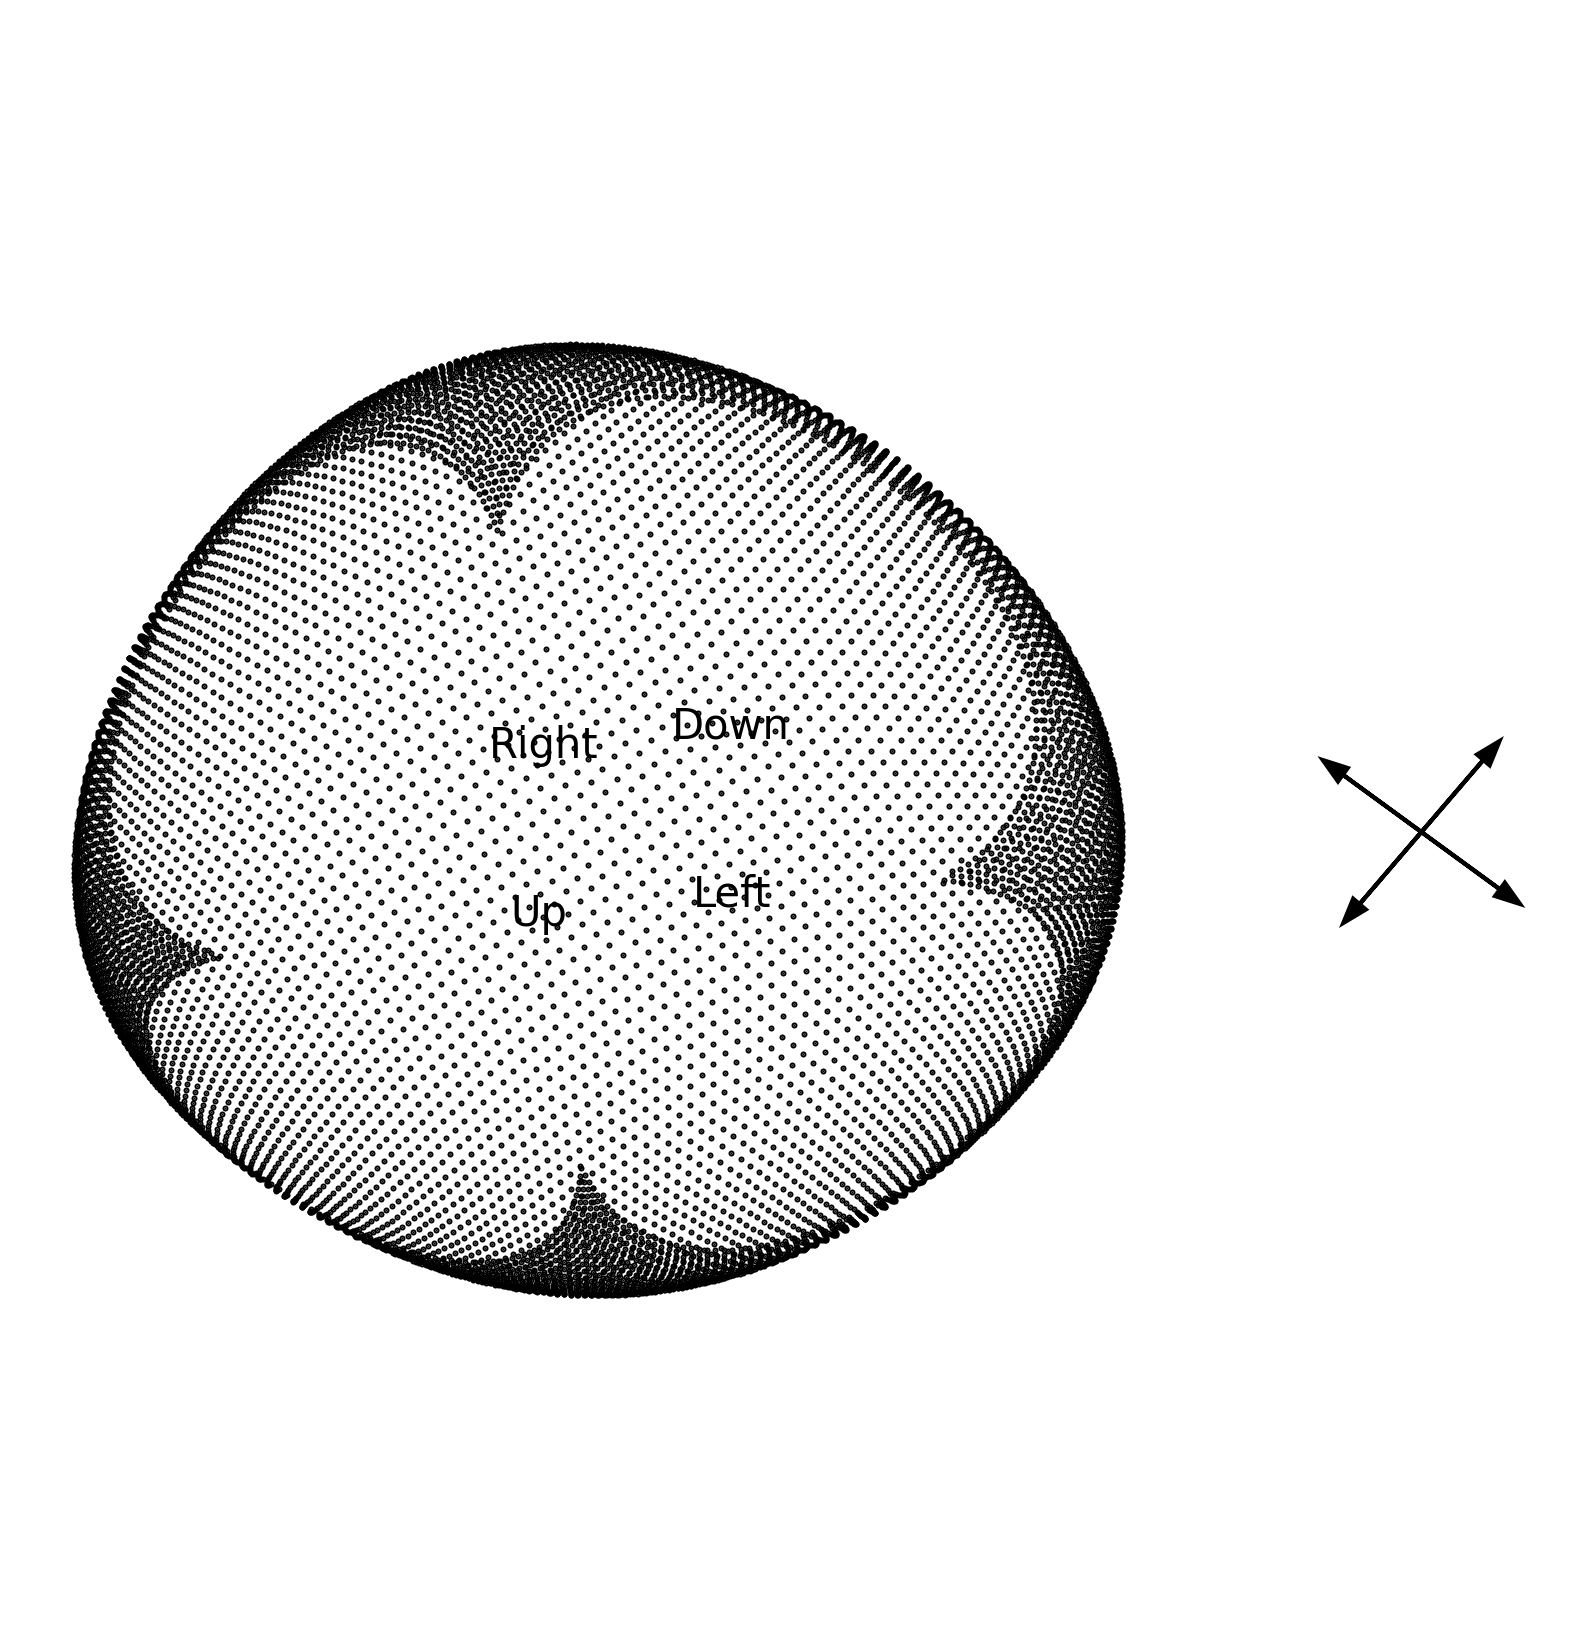

W matrix shape: (200, 4)


In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

grid_res = 50
x_vals = np.linspace(env_min, env_max, grid_res)
y_vals = np.linspace(env_min, env_max, grid_res)
X, Y = np.meshgrid(x_vals, y_vals)

# Grid embedding and coords from workspace
H, W, n_cells = grid_embeddings.shape
dx = X[0, 1] - X[0, 0]
dy = Y[1, 0] - Y[0, 0]

# Top 10% largest-scale cells
threshold_10 = np.percentile(scales, 80)
top10_idx = np.where(scales >= threshold_10)[0]
n_top = len(top10_idx)

# Extract embeddings for top cells
emb_top10 = grid_embeddings.take(top10_idx, axis=2)

# Compute finite differences
partial_x = (emb_top10[:, 1:, :] - emb_top10[:, :-1, :]) / dx
partial_y = (emb_top10[1:, :, :] - emb_top10[:-1, :, :]) / dy

# Average over space
avg_px = partial_x.reshape(-1, n_top).mean(axis=0)
avg_py = partial_y.reshape(-1, n_top).mean(axis=0)

# W matrix (#top,4): [Up, Down, Left, Right]
W = np.stack([ avg_py, -avg_py, -avg_px, avg_px ], axis=1)

# Build flattened embedding matrix manually (H*W, n_top)
emb_flat_top = np.stack([emb_top10[:, :, i].ravel() for i in range(n_top)], axis=1)

# PCA on embeddings of top cells
pca_top10 = PCA(n_components=2)
pc_top10 = pca_top10.fit_transform(emb_flat_top)

# Project action vectors
vectors = pca_top10.components_.dot(W)  # (2,4)

# Plot PCA scatter + arrows
plt.figure(figsize=(6, 6),dpi=300)
plt.scatter(pc_top10[:, 0], pc_top10[:, 1], s=0.2,c='black')

actions = ['Up', 'Down', 'Left', 'Right']
for i, action in enumerate(actions):
    vx, vy = vectors[0, i], vectors[1, i]
    plt.arrow(20, 0, vx, vy, head_width=0.4,fc='black')
    plt.text(vx * 1.3, vy * 1.3, action)

# plt.title('PCA of Top-10%-Scale Grid Embeddings with Action Vectors')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axis('equal')
plt.tight_layout()
plt.axis('off')
plt.show()

print("W matrix shape:", W.shape)


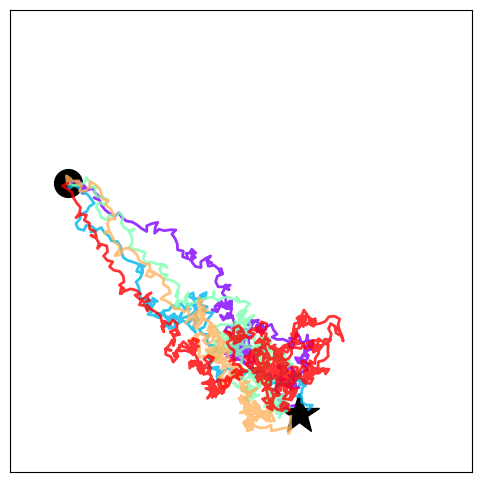

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# -------------------------
# Helpers from earlier
# -------------------------
def grid_activation(x, y, scales, phases, orientations):
    pos = np.array([x, y])
    angles = np.array([0, np.pi/3, 2*np.pi/3])
    acts = []
    for scale, phase, orient in zip(scales, phases, orientations):
        R = np.array([[np.cos(orient), -np.sin(orient)],
                      [np.sin(orient),  np.cos(orient)]])
        pr = R @ (pos - phase)
        proj = pr[0]*np.cos(angles) + pr[1]*np.sin(angles)
        grating = np.sum(np.cos((4*np.pi/(scale*np.sqrt(3))) * proj))
        acts.append((2/3)*grating)
    return np.array(acts)

def is_inside_rect(pos, rect):
    x, y, l, orient = rect
    if orient == 'h':
        x0, y0 = x - l/2, y - 0.05
        x1, y1 = x + l/2, y + 0.05
    else:
        x0, y0 = x - 0.05, y - l/2
        x1, y1 = x + 0.05, y + l/2
    return (x0 <= pos[0] <= x1) and (y0 <= pos[1] <= y1)

def seg_intersect(A, B, C, D):
    def ccw(P, Q, R):
        return (R[1]-P[1])*(Q[0]-P[0]) > (Q[1]-P[1])*(R[0]-P[0])
    return ccw(A, C, D) != ccw(B, C, D) and ccw(A, B, C) != ccw(A, B, D)

def segment_intersects_rect(p1, p2, rect):
    x0, x1, y0, y1 = (rect[0] - rect[2]/2, rect[0] + rect[2]/2,
                      rect[1] - (0.01 if rect[3]=='h' else rect[2]/2),
                      rect[1] + (0.01 if rect[3]=='h' else rect[2]/2))
    if x0 <= p2[0] <= x1 and y0 <= p2[1] <= y1:
        return True
    edges = [
        (np.array([x0, y0]), np.array([x1, y0])),
        (np.array([x1, y0]), np.array([x1, y1])),
        (np.array([x1, y1]), np.array([x0, y1])),
        (np.array([x0, y1]), np.array([x0, y0])),
    ]
    for C, D in edges:
        if seg_intersect(p1, p2, C, D):
            return True
    return False

def is_valid_position(pos, walls):
    if not (0 <= pos[0] <= 4 and 0 <= pos[1] <= 4):
        return False
    for w in walls:
        if is_inside_rect(pos, w):
            return False
    return True

def compute_valid_step(pos, vel, dt, walls):
    full = vel * dt
    cand = pos + full
    if is_valid_position(cand, walls) and not any(segment_intersects_rect(pos, cand, w) for w in walls):
        return cand
    # slide
    for dx, dy in [(full[0], 0), (0, full[1])]:
        cand2 = pos + np.array([dx, dy])
        if is_valid_position(cand2, walls) and not any(segment_intersects_rect(pos, cand2, w) for w in walls):
            return cand2
    # fallback smaller
    for f in [0.5, 0.25, 0.1]:
        cand3 = pos + full * f
        if is_valid_position(cand3, walls) and not any(segment_intersects_rect(pos, cand3, w) for w in walls):
            return cand3
    return pos

# -------------------------
# Setup grid code & W
# -------------------------
# Use pre-generated scales, phases, orientations, X, Y from workspace

# Select top 10%
threshold = np.percentile(scales, 90)
top_idx = np.where(scales >= threshold)[0]
sc_top = scales[top_idx]
ph_top = phases[top_idx]
or_top = orientations[top_idx]
n_top = len(top_idx)

# Compute W by finite differences averaged
# reuse grid_embeddings, X, Y
H, Wg, _ = grid_embeddings.shape
dx = X[0,1] - X[0,0]
dy = Y[1,0] - Y[0,0]
emb_top = grid_embeddings[:,:,top_idx]
pd_x = (emb_top[:,1:,:] - emb_top[:,:-1,:]) / dx
pd_y = (emb_top[1:,:,:] - emb_top[:-1,:,:]) / dy
avg_px = pd_x.reshape(-1, n_top).mean(axis=0)
avg_py = pd_y.reshape(-1, n_top).mean(axis=0)
Wmat = np.stack([avg_py, -avg_py, -avg_px, avg_px], axis=1)

# -------------------------
# Navigation via grid code
# -------------------------
walls = []  # no walls
start = np.array([0.5, 2.5])
goal  = np.array([2.5, 0.5])
noise_level = 80


dt = 0.05
threshold = 0.1
max_steps = 2000

# Precompute goal embedding
goal_emb = grid_activation(goal[0], goal[1], sc_top, ph_top, or_top)

paths = []
for _ in range(5):
    pos = start.copy()
    path = [pos.copy()]
    for _ in range(max_steps):
        # current embedding
        cur_emb = grid_activation(pos[0], pos[1], sc_top, ph_top, or_top)
        delta = goal_emb - cur_emb  # high-D target diff
        scores = delta @ Wmat + noise_level * np.random.randn(4)     # (4,) for [Up,Down,Left,Right]
        # compute movement
        step = np.array([scores[3] - scores[2], scores[0] - scores[1]])
        # normalize to unit-length
        if np.linalg.norm(step) > 1e-6:
            step = step / np.linalg.norm(step)
        pos = compute_valid_step(pos, step, dt, walls)
        path.append(pos.copy())
        if np.linalg.norm(pos - goal) < threshold:
            break
    paths.append(np.array(path))

# -------------------------
# Plotting
# -------------------------
fig, ax = plt.subplots(figsize=(6,6))

ax.plot(start[0], start[1], 'o', ms=20, c='black')
ax.plot(goal[0], goal[1], '*', ms=30, c='black')
colors = plt.cm.rainbow(np.linspace(0,1,len(paths)))
for p, c in zip(paths, colors):
    ax.plot(p[:,0], p[:,1], color=c, lw=2, alpha=0.8)
ax.set_xlim(0,4); ax.set_ylim(0,4); ax.set_aspect('equal')

ax.set_xticks([])
ax.set_yticks([])
# ax.axis('off')
plt.show()


In [129]:
probs.max()

992.5255450999966

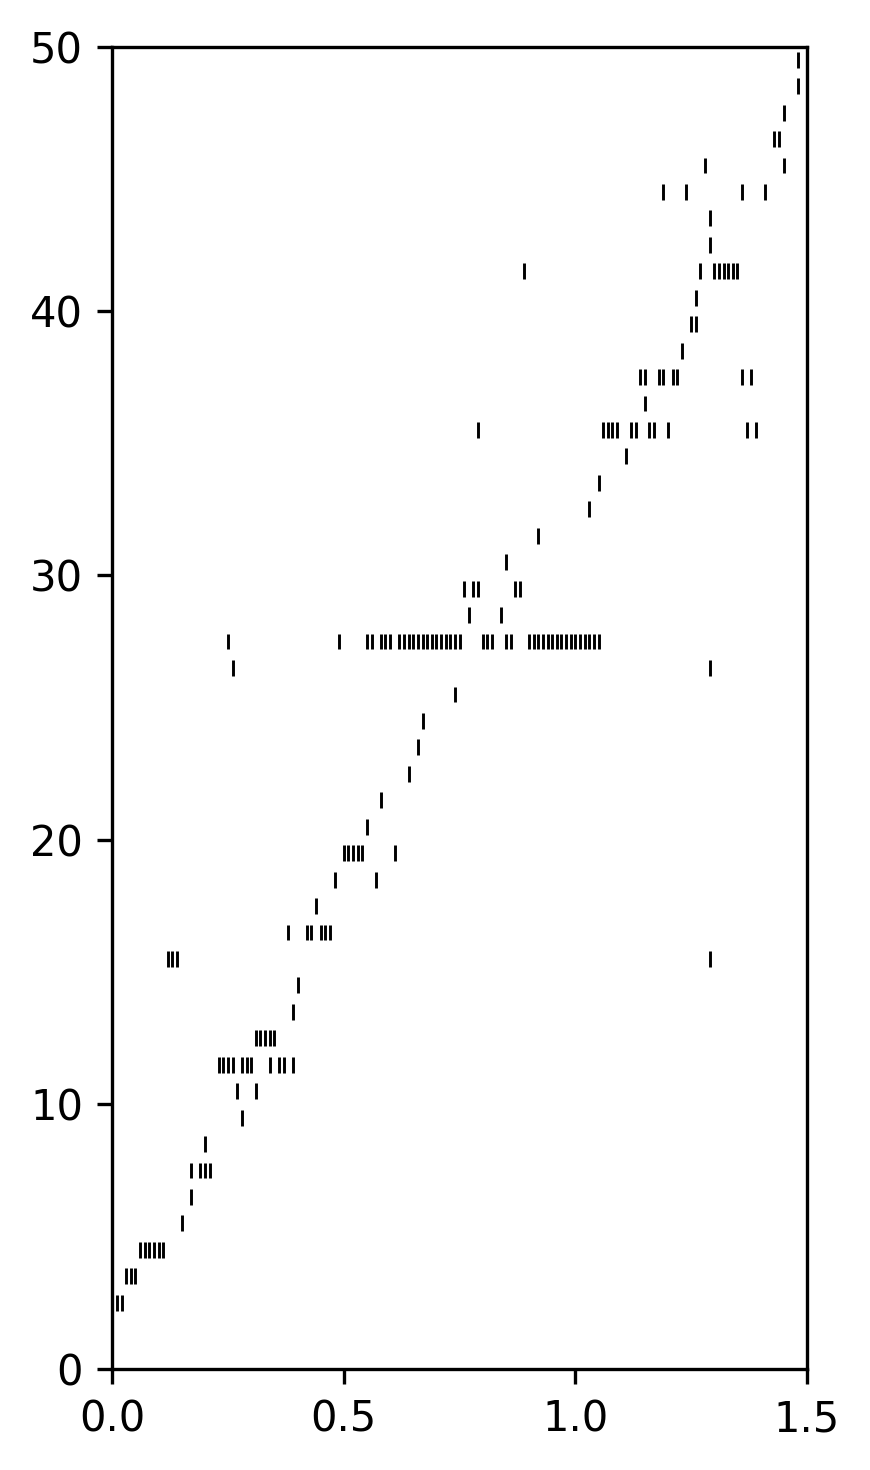

In [177]:
import numpy as np
import matplotlib.pyplot as plt

# — your existing grid_activation, scales, phases, orientations, and BTSP weights —
#   grid_activation(x,y,scales,phases,orientations) → (n_grid_cells,)
#   weights: shape (n_place_cells, n_grid_cells)
#   paths: list of trajectories, each shape [T,2]

# 1) Grab first trajectory
traj = paths[0]
T    = traj.shape[0]
n_pc = weights.shape[0]

# 2) Sample spikes from learned place-cell activations
spikes = np.zeros((T, n_pc), dtype=int)
for t, (x, y) in enumerate(traj):
    gact   = grid_activation(x, y, scales, phases, orientations)  # pre-syn grid code
    p_act  = weights @ gact                                        # learned place-cell drive
    exps   = np.exp(p_act - p_act.max())                           
    probs  = exps / exps.sum() * 1  + 0.0005*np.random.randn(exps.shape[0])                                  # softmax → firing probs
    spikes[t] = (np.random.rand(n_pc) < probs).astype(int)

# 3) Pick top-50 most active, rank by mean spike time
counts   = spikes.sum(axis=0)
avg_time = (np.arange(T)[:,None] * spikes).sum(axis=0) / (counts + 1e-9)

top50    = np.argsort(counts)[-50:]        # highest-firing 50
order    = np.argsort(avg_time[top50])     # earliest mean time first
selected = top50[order]

# 4) Raster plot (spikes only)
fig, ax = plt.subplots(figsize=(3,5), dpi=300)
for r, neuron in enumerate(selected):
    times = np.where(spikes[:, neuron])[0]
    ax.vlines(times, r + 0.2, r + 0.8, color='black', linewidth=0.7)

ax.set_xlim(0, T)
ax.set_ylim(0, 50)
# ax.set_xlabel('Time step')
ticks = ax.get_xticks()                  # e.g. [0, 100, 200, …]
ax.set_xticks(ticks)                    
ax.set_xticklabels([(t/100) for t in ticks])

ax.set_yticks([0,10,20,30,40,50])   # hide neuron labels
plt.tight_layout()
plt.show()


In [144]:
ticks

array([   0.,  500., 1000.])

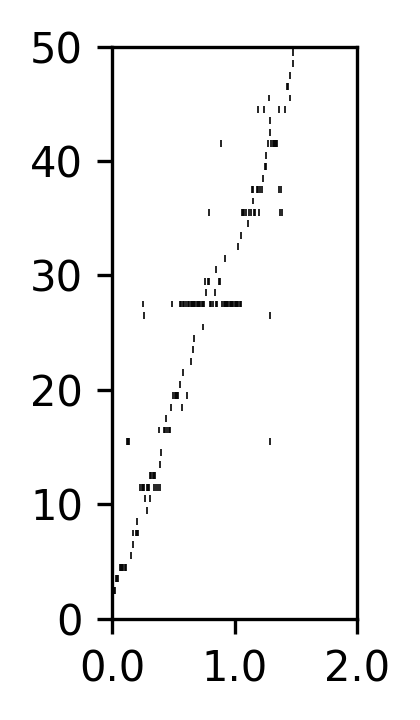

In [178]:
fig, ax = plt.subplots(figsize=(1.5,2.5), dpi=300)
for r, neuron in enumerate(selected):
    times = np.where(spikes[:, neuron])[0]
    ax.vlines(times, r + 0.2, r + 0.8, color='black', linewidth=0.4)

ax.set_xlim(0, T)
ax.set_ylim(0, 50)
# ax.set_xlabel('Time step')
ticks = ax.get_xticks()                  # e.g. [0, 100, 200, …]
# ticks = [0,100,200,300,400,500]
ax.set_xticks(ticks)                    
ax.set_xticklabels([(t/100) for t in ticks])

ax.set_yticks([0,10,20,30,40,50])   # hide neuron labels
plt.tight_layout()
plt.show()


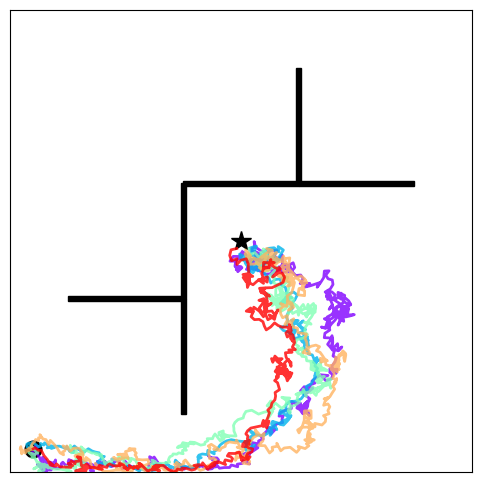

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# -------------------------
# Helpers from earlier
# -------------------------
def grid_activation(x, y, scales, phases, orientations):
    pos = np.array([x, y])
    angles = np.array([0, np.pi/3, 2*np.pi/3])
    acts = []
    for scale, phase, orient in zip(scales, phases, orientations):
        R = np.array([[np.cos(orient), -np.sin(orient)],
                      [np.sin(orient),  np.cos(orient)]])
        pr = R @ (pos - phase)
        proj = pr[0]*np.cos(angles) + pr[1]*np.sin(angles)
        grating = np.sum(np.cos((4*np.pi/(scale*np.sqrt(3))) * proj))
        acts.append((2/3)*grating)
    return np.array(acts)


def rect_bounds(rect, eps=0.01):
    x, y, l, orient = rect
    if orient == 'h':
        # horizontal: thin in y
        return (x - l/2, x + l/2,
                y - eps,     y + eps)
    else:
        # vertical: thin in x
        return (x - eps,    x + eps,
                y - l/2, y + l/2)

def is_inside_rect(pos, rect):
    x0, x1, y0, y1 = rect_bounds(rect)
    return (x0 <= pos[0] <= x1) and (y0 <= pos[1] <= y1)

def segment_intersects_rect(p1, p2, rect):
    x0, x1, y0, y1 = rect_bounds(rect)
    # If endpoint lies within rect, it intersects
    if x0 <= p2[0] <= x1 and y0 <= p2[1] <= y1:
        return True
    # Otherwise check each edge
    edges = [
        (np.array([x0, y0]), np.array([x1, y0])),
        (np.array([x1, y0]), np.array([x1, y1])),
        (np.array([x1, y1]), np.array([x0, y1])),
        (np.array([x0, y1]), np.array([x0, y0]))
    ]
    for C, D in edges:
        if seg_intersect(p1, p2, C, D):
            return True
    return False

# def is_inside_rect(pos, rect):
#     x, y, l, orient = rect
#     if orient == 'h':
#         x0, y0 = x - l/2, y - 0.05
#         x1, y1 = x + l/2, y + 0.05
#     else:
#         x0, y0 = x - 0.05, y - l/2
#         x1, y1 = x + 0.05, y + l/2
#     return (x0 <= pos[0] <= x1) and (y0 <= pos[1] <= y1)

def ccw(A, B, C):
    return (C[1]-A[1])*(B[0]-A[0]) > (B[1]-A[1])*(C[0]-A[0])

def seg_intersect(A, B, C, D):
    return ccw(A, C, D) != ccw(B, C, D) and ccw(A, B, C) != ccw(A, B, D)

# def segment_intersects_rect(p1, p2, rect):
#     x0, x1, y0, y1 = (
#         rect[0] - rect[2]/2, rect[0] + rect[2]/2,
#         rect[1] - (0.01 if rect[3]=='h' else rect[2]/2),
#         rect[1] + (0.01 if rect[3]=='h' else rect[2]/2)
#     )
#     if x0 <= p2[0] <= x1 and y0 <= p2[1] <= y1:
#         return True
#     edges = [
#         (np.array([x0, y0]), np.array([x1, y0])),
#         (np.array([x1, y0]), np.array([x1, y1])),
#         (np.array([x1, y1]), np.array([x0, y1])),
#         (np.array([x0, y1]), np.array([x0, y0])),
#     ]
#     for C, D in edges:
#         if seg_intersect(p1, p2, C, D):
#             return True
    return False

def is_valid_position(pos, walls):
    if not (0 <= pos[0] <= 4 and 0 <= pos[1] <= 4):
        return False
    for w in walls:
        if is_inside_rect(pos, w):
            return False
    return True

def compute_valid_step(pos, vel, dt, walls):
    full = vel * dt
    cand = pos + full
    if is_valid_position(cand, walls) and not any(segment_intersects_rect(pos, cand, w) for w in walls):
        return cand
    # slide
    for dx, dy in [(full[0], 0), (0, full[1])]:
        cand2 = pos + np.array([dx, dy])
        if is_valid_position(cand2, walls) and not any(segment_intersects_rect(pos, cand2, w) for w in walls):
            return cand2
    # fallback smaller
    for f in [0.5, 0.25, 0.1]:
        cand3 = pos + full * f
        if is_valid_position(cand3, walls) and not any(segment_intersects_rect(pos, cand3, w) for w in walls):
            return cand3
    return pos

# -------------------------
# Setup grid code & W
# -------------------------
# Top 10% scales
threshold = np.percentile(scales, 90)
top_idx = np.where(scales >= threshold)[0]
sc_top = scales[top_idx]
ph_top = phases[top_idx]
or_top = orientations[top_idx]
n_top = len(top_idx)

# Finite diff to build Wmat
H, Wg, _ = grid_embeddings.shape
dx = X[0,1] - X[0,0]
dy = Y[1,0] - Y[0,0]
emb_top = grid_embeddings[:,:,top_idx]
pd_x = (emb_top[:,1:,:] - emb_top[:,:-1,:]) / dx
pd_y = (emb_top[1:,:,:] - emb_top[:-1,:,:]) / dy
avg_px = pd_x.reshape(-1, n_top).mean(axis=0)
avg_py = pd_y.reshape(-1, n_top).mean(axis=0)
Wmat = np.stack([avg_py, -avg_py, -avg_px, avg_px], axis=1)

# -------------------------
# Navigation with repulsion
# -------------------------
walls = [
    (1,1.5,1,'h'),
    (1.5,1,1,'v'),
    (1.5,2,1,'v'),
    (2,2.5,1,'h'),
    (3,2.5,1,'h'),
    (2.5,3,1,'v')
]
# Precompute repulsion points
rep_points = []
for x, y, l, orient in walls:
    rep_points.append(np.array([x, y]))
    if orient == 'h':
        rep_points += [np.array([x-l/2,y]), np.array([x+l/2,y])]
    else:
        rep_points += [np.array([x,y-l/2]), np.array([x,y+l/2])]

start = np.array([0.2, 0.2])
goal  = np.array([2.0, 2.0])
k_wall = 0.08
noise_level = 30.0
dt = 0.05
threshold_goal = 0.1
max_steps = 1000
n_paths = 5
max_dist = np.linalg.norm(start - goal)
goal_emb = grid_activation(goal[0], goal[1], sc_top, ph_top, or_top)

def compute_velocity(pos):
    # Repulsive 2D
    f_rep = np.zeros(2)
    for wc in rep_points:
        delta = pos - wc
        dsq = np.sum(delta**2)
        if dsq > 1e-4:
            f_rep += k_wall * delta / dsq
    rep_scale = np.clip(np.linalg.norm(pos-goal) / max_dist, 0, 1)
    f_rep *= rep_scale

    # Grid-code guidance
    cur_emb = grid_activation(pos[0], pos[1], sc_top, ph_top, or_top)
    delta_emb = goal_emb - cur_emb
    scores = delta_emb @ Wmat + noise_level * np.random.randn(4)  # [Up,Down,Left,Right]
    step = np.array([scores[3]-scores[2], scores[0]-scores[1]])
    if np.linalg.norm(step) > 1e-6:
        step = step / np.linalg.norm(step)

    return step + f_rep  # combine

# Generate paths
paths = []
for _ in range(n_paths):
    pos = start.copy()
    path = [pos.copy()]
    for _ in range(max_steps):
        vel = compute_velocity(pos)
        pos = compute_valid_step(pos, vel, dt, walls)
        path.append(pos.copy())
        if np.linalg.norm(pos - goal) < threshold_goal:
            break
    paths.append(np.array(path))

# -------------------------
# Plotting
# -------------------------
fig, ax = plt.subplots(figsize=(6,6))
# draw walls
for x, y, l, orient in walls:
    if orient == 'h':
        ax.add_patch(patches.Rectangle((x-l/2, y-0.02), l, 0.04, color='black'))
    else:
        ax.add_patch(patches.Rectangle((x-0.02, y-l/2), 0.04, l, color='black'))
# start & goal
ax.plot(start[0], start[1], 'o', ms=12, c='black')
ax.plot(goal[0], goal[1], '*', ms=15, c='black')
# paths
colors = plt.cm.rainbow(np.linspace(0,1,n_paths))
for p, c in zip(paths, colors):
    ax.plot(p[:,0], p[:,1], color=c, lw=2, alpha=0.8)
ax.set_xlim(0,4); ax.set_ylim(0,4); ax.set_aspect('equal')
ax.set_xticks([]); ax.set_yticks([])
plt.show()


In [67]:
vel

array([0.96031057, 0.27893298])